In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: SPG
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


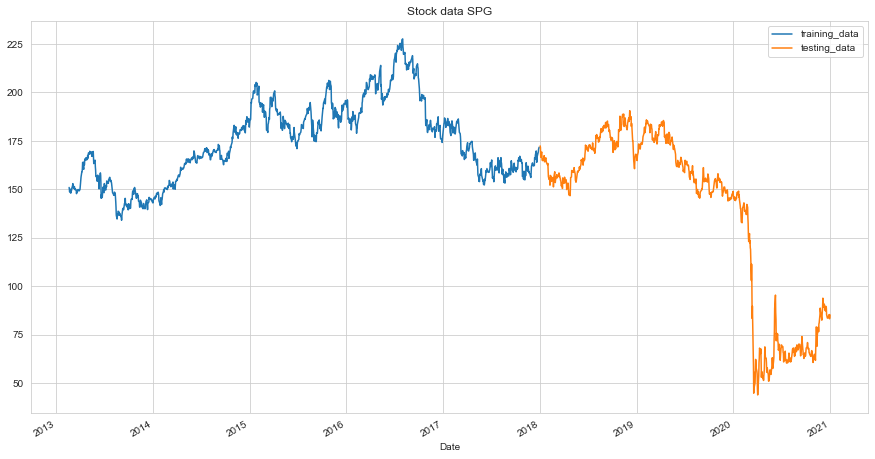

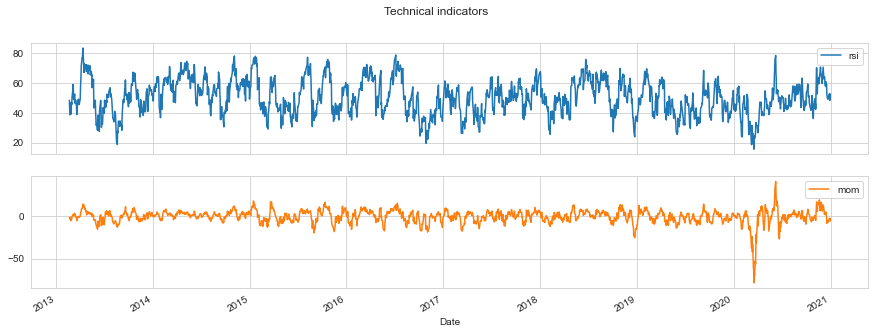

In [2]:
stock_name = 'spg'.upper()
industry = 'Real estate'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1159.76, duration: 0:00:00.399090
episode: 2/2000, episode end value: 1176.50, duration: 0:00:00.337084
episode: 3/2000, episode end value: 1145.89, duration: 0:00:00.419090
episode: 4/2000, episode end value: 1140.89, duration: 0:00:00.462104
episode: 5/2000, episode end value: 1137.73, duration: 0:00:00.497112
episode: 6/2000, episode end value: 1138.30, duration: 0:00:00.468092
episode: 7/2000, episode end value: 1140.40, duration: 0:00:00.416801
episode: 8/2000, episode end value: 1137.48, duration: 0:00:00.347037
episode: 9/2000, episode end value: 1138.62, duration: 0:00:00.331856
episode: 10/2000, episode end value: 1119.46, duration: 0:00:00.243605
episode: 11/2000, episode end value: 1132.16, duration: 0:00:00.312548
episode: 12/2000, episode end value: 1137.21, duration: 0:00:00.306873
episode: 13/2000, episode end value: 1141.84, duration: 0:00:00.322889
episode: 14/2000, episode end value: 1146.85, duration: 0:00:00.281636
episode: 15/200

episode: 117/2000, episode end value: 1159.97, duration: 0:00:00.424258
episode: 118/2000, episode end value: 1116.08, duration: 0:00:00.375166
episode: 119/2000, episode end value: 1156.25, duration: 0:00:00.356851
episode: 120/2000, episode end value: 1129.90, duration: 0:00:00.337160
episode: 121/2000, episode end value: 1147.97, duration: 0:00:00.356515
episode: 122/2000, episode end value: 1106.46, duration: 0:00:00.280070
episode: 123/2000, episode end value: 1082.01, duration: 0:00:00.306246
episode: 124/2000, episode end value: 1111.69, duration: 0:00:00.365032
episode: 125/2000, episode end value: 1125.98, duration: 0:00:00.336163
episode: 126/2000, episode end value: 1076.18, duration: 0:00:00.304582
episode: 127/2000, episode end value: 1109.04, duration: 0:00:00.378213
episode: 128/2000, episode end value: 1108.03, duration: 0:00:00.305542
episode: 129/2000, episode end value: 1102.39, duration: 0:00:00.354323
episode: 130/2000, episode end value: 1113.42, duration: 0:00:00

episode: 231/2000, episode end value: 1149.69, duration: 0:00:00.447136
episode: 232/2000, episode end value: 1150.94, duration: 0:00:00.433347
episode: 233/2000, episode end value: 1133.24, duration: 0:00:00.422279
episode: 234/2000, episode end value: 1145.96, duration: 0:00:00.422378
episode: 235/2000, episode end value: 1156.43, duration: 0:00:00.400106
episode: 236/2000, episode end value: 1143.67, duration: 0:00:00.464245
episode: 237/2000, episode end value: 1139.98, duration: 0:00:00.393583
episode: 238/2000, episode end value: 1146.24, duration: 0:00:00.499625
episode: 239/2000, episode end value: 1149.92, duration: 0:00:00.483668
episode: 240/2000, episode end value: 1149.94, duration: 0:00:00.383762
episode: 241/2000, episode end value: 1105.35, duration: 0:00:00.416850
episode: 242/2000, episode end value: 1144.67, duration: 0:00:00.444189
episode: 243/2000, episode end value: 1150.89, duration: 0:00:00.424191
episode: 244/2000, episode end value: 1147.43, duration: 0:00:00

episode: 345/2000, episode end value: 1166.52, duration: 0:00:00.333984
episode: 346/2000, episode end value: 1152.28, duration: 0:00:00.391128
episode: 347/2000, episode end value: 1118.08, duration: 0:00:00.327052
episode: 348/2000, episode end value: 1142.22, duration: 0:00:00.302911
episode: 349/2000, episode end value: 1126.36, duration: 0:00:00.346269
episode: 350/2000, episode end value: 1142.39, duration: 0:00:00.382024
episode: 351/2000, episode end value: 1137.84, duration: 0:00:00.421912
episode: 352/2000, episode end value: 1116.56, duration: 0:00:00.308752
episode: 353/2000, episode end value: 1139.11, duration: 0:00:00.352033
episode: 354/2000, episode end value: 1159.31, duration: 0:00:00.373197
episode: 355/2000, episode end value: 1121.71, duration: 0:00:00.347974
episode: 356/2000, episode end value: 1135.25, duration: 0:00:00.346315
episode: 357/2000, episode end value: 1130.94, duration: 0:00:00.393807
episode: 358/2000, episode end value: 1142.45, duration: 0:00:00

episode: 459/2000, episode end value: 1153.93, duration: 0:00:00.445499
episode: 460/2000, episode end value: 1140.61, duration: 0:00:00.405094
episode: 461/2000, episode end value: 1139.01, duration: 0:00:00.428423
episode: 462/2000, episode end value: 1138.35, duration: 0:00:00.417471
episode: 463/2000, episode end value: 1144.38, duration: 0:00:00.459696
episode: 464/2000, episode end value: 1141.54, duration: 0:00:00.418096
episode: 465/2000, episode end value: 1146.40, duration: 0:00:00.406945
episode: 466/2000, episode end value: 1138.56, duration: 0:00:00.392318
episode: 467/2000, episode end value: 1143.54, duration: 0:00:00.430340
episode: 468/2000, episode end value: 1160.37, duration: 0:00:00.533581
episode: 469/2000, episode end value: 1143.22, duration: 0:00:00.477974
episode: 470/2000, episode end value: 1150.85, duration: 0:00:00.469211
episode: 471/2000, episode end value: 1142.92, duration: 0:00:00.399728
episode: 472/2000, episode end value: 1147.06, duration: 0:00:00

episode: 573/2000, episode end value: 1128.45, duration: 0:00:00.373971
episode: 574/2000, episode end value: 1123.48, duration: 0:00:00.473183
episode: 575/2000, episode end value: 1137.14, duration: 0:00:00.574495
episode: 576/2000, episode end value: 1140.97, duration: 0:00:00.392444
episode: 577/2000, episode end value: 1141.38, duration: 0:00:00.496308
episode: 578/2000, episode end value: 1142.55, duration: 0:00:00.421844
episode: 579/2000, episode end value: 1146.38, duration: 0:00:00.399705
episode: 580/2000, episode end value: 1149.27, duration: 0:00:00.401877
episode: 581/2000, episode end value: 1142.31, duration: 0:00:00.482339
episode: 582/2000, episode end value: 1150.66, duration: 0:00:00.455995
episode: 583/2000, episode end value: 1145.81, duration: 0:00:00.411423
episode: 584/2000, episode end value: 1144.32, duration: 0:00:00.427287
episode: 585/2000, episode end value: 1144.70, duration: 0:00:00.466174
episode: 586/2000, episode end value: 1146.05, duration: 0:00:00

episode: 687/2000, episode end value: 1146.63, duration: 0:00:00.390836
episode: 688/2000, episode end value: 1142.19, duration: 0:00:00.428286
episode: 689/2000, episode end value: 1149.66, duration: 0:00:00.352637
episode: 690/2000, episode end value: 1146.22, duration: 0:00:00.431052
episode: 691/2000, episode end value: 1141.63, duration: 0:00:00.429111
episode: 692/2000, episode end value: 1154.60, duration: 0:00:00.411204
episode: 693/2000, episode end value: 1154.16, duration: 0:00:00.458580
episode: 694/2000, episode end value: 1145.52, duration: 0:00:00.416076
episode: 695/2000, episode end value: 1145.79, duration: 0:00:00.486958
episode: 696/2000, episode end value: 1146.76, duration: 0:00:00.432750
episode: 697/2000, episode end value: 1143.72, duration: 0:00:00.409640
episode: 698/2000, episode end value: 1146.32, duration: 0:00:00.421514
episode: 699/2000, episode end value: 1141.79, duration: 0:00:00.433936
episode: 700/2000, episode end value: 1150.01, duration: 0:00:00

episode: 801/2000, episode end value: 1111.84, duration: 0:00:00.310782
episode: 802/2000, episode end value: 1099.53, duration: 0:00:00.354487
episode: 803/2000, episode end value: 1077.68, duration: 0:00:00.287258
episode: 804/2000, episode end value: 1123.58, duration: 0:00:00.327529
episode: 805/2000, episode end value: 1096.48, duration: 0:00:00.316167
episode: 806/2000, episode end value: 1104.83, duration: 0:00:00.297566
episode: 807/2000, episode end value: 1128.01, duration: 0:00:00.375600
episode: 808/2000, episode end value: 1104.37, duration: 0:00:00.344632
episode: 809/2000, episode end value: 1141.30, duration: 0:00:00.341833
episode: 810/2000, episode end value: 1126.54, duration: 0:00:00.307063
episode: 811/2000, episode end value: 1075.65, duration: 0:00:00.249231
episode: 812/2000, episode end value: 1113.31, duration: 0:00:00.363871
episode: 813/2000, episode end value: 1111.44, duration: 0:00:00.328170
episode: 814/2000, episode end value: 1133.19, duration: 0:00:00

episode: 915/2000, episode end value: 1145.87, duration: 0:00:00.471148
episode: 916/2000, episode end value: 1144.33, duration: 0:00:00.496006
episode: 917/2000, episode end value: 1156.50, duration: 0:00:00.399148
episode: 918/2000, episode end value: 1143.33, duration: 0:00:00.424371
episode: 919/2000, episode end value: 1147.17, duration: 0:00:00.465878
episode: 920/2000, episode end value: 1145.52, duration: 0:00:00.403413
episode: 921/2000, episode end value: 1145.38, duration: 0:00:00.380733
episode: 922/2000, episode end value: 1151.88, duration: 0:00:00.456839
episode: 923/2000, episode end value: 1138.45, duration: 0:00:00.512960
episode: 924/2000, episode end value: 1151.72, duration: 0:00:00.390341
episode: 925/2000, episode end value: 1142.50, duration: 0:00:00.382908
episode: 926/2000, episode end value: 1137.26, duration: 0:00:00.358070
episode: 927/2000, episode end value: 1142.35, duration: 0:00:00.427885
episode: 928/2000, episode end value: 1140.48, duration: 0:00:00

episode: 1029/2000, episode end value: 1146.14, duration: 0:00:00.512364
episode: 1030/2000, episode end value: 1141.17, duration: 0:00:00.476787
episode: 1031/2000, episode end value: 1146.68, duration: 0:00:00.412113
episode: 1032/2000, episode end value: 1156.48, duration: 0:00:00.478272
episode: 1033/2000, episode end value: 1148.90, duration: 0:00:00.399072
episode: 1034/2000, episode end value: 1146.44, duration: 0:00:00.502981
episode: 1035/2000, episode end value: 1138.09, duration: 0:00:00.449590
episode: 1036/2000, episode end value: 1146.75, duration: 0:00:00.378171
episode: 1037/2000, episode end value: 1137.94, duration: 0:00:00.370290
episode: 1038/2000, episode end value: 1148.53, duration: 0:00:00.306342
episode: 1039/2000, episode end value: 1141.90, duration: 0:00:00.374584
episode: 1040/2000, episode end value: 1097.03, duration: 0:00:00.267668
episode: 1041/2000, episode end value: 1109.13, duration: 0:00:00.288130
episode: 1042/2000, episode end value: 1155.09, dur

episode: 1142/2000, episode end value: 1103.15, duration: 0:00:00.314056
episode: 1143/2000, episode end value: 1096.91, duration: 0:00:00.304928
episode: 1144/2000, episode end value: 1119.84, duration: 0:00:00.339454
episode: 1145/2000, episode end value: 1096.54, duration: 0:00:00.329659
episode: 1146/2000, episode end value: 1117.61, duration: 0:00:00.354344
episode: 1147/2000, episode end value: 1123.52, duration: 0:00:00.322599
episode: 1148/2000, episode end value: 1101.07, duration: 0:00:00.286481
episode: 1149/2000, episode end value: 1120.31, duration: 0:00:00.294534
episode: 1150/2000, episode end value: 1116.82, duration: 0:00:00.333543
episode: 1151/2000, episode end value: 1097.97, duration: 0:00:00.353259
episode: 1152/2000, episode end value: 1125.78, duration: 0:00:00.335334
episode: 1153/2000, episode end value: 1103.48, duration: 0:00:00.323241
episode: 1154/2000, episode end value: 1072.39, duration: 0:00:00.300805
episode: 1155/2000, episode end value: 1107.25, dur

episode: 1255/2000, episode end value: 1152.29, duration: 0:00:00.396913
episode: 1256/2000, episode end value: 1116.38, duration: 0:00:00.299368
episode: 1257/2000, episode end value: 1103.51, duration: 0:00:00.350627
episode: 1258/2000, episode end value: 1133.89, duration: 0:00:00.342631
episode: 1259/2000, episode end value: 1110.42, duration: 0:00:00.304857
episode: 1260/2000, episode end value: 1101.47, duration: 0:00:00.276466
episode: 1261/2000, episode end value: 1133.96, duration: 0:00:00.374579
episode: 1262/2000, episode end value: 1111.03, duration: 0:00:00.318085
episode: 1263/2000, episode end value: 1097.88, duration: 0:00:00.362717
episode: 1264/2000, episode end value: 1104.73, duration: 0:00:00.294847
episode: 1265/2000, episode end value: 1148.87, duration: 0:00:00.316546
episode: 1266/2000, episode end value: 1126.35, duration: 0:00:00.302623
episode: 1267/2000, episode end value: 1094.21, duration: 0:00:00.262850
episode: 1268/2000, episode end value: 1061.54, dur

episode: 1368/2000, episode end value: 1101.38, duration: 0:00:00.317402
episode: 1369/2000, episode end value: 1112.00, duration: 0:00:00.384950
episode: 1370/2000, episode end value: 1108.99, duration: 0:00:00.328708
episode: 1371/2000, episode end value: 1132.88, duration: 0:00:00.432450
episode: 1372/2000, episode end value: 1146.87, duration: 0:00:00.382695
episode: 1373/2000, episode end value: 1115.83, duration: 0:00:00.343456
episode: 1374/2000, episode end value: 1133.67, duration: 0:00:00.398445
episode: 1375/2000, episode end value: 1120.87, duration: 0:00:00.381536
episode: 1376/2000, episode end value: 1128.67, duration: 0:00:00.288918
episode: 1377/2000, episode end value: 1133.21, duration: 0:00:00.401256
episode: 1378/2000, episode end value: 1123.57, duration: 0:00:00.399130
episode: 1379/2000, episode end value: 1123.84, duration: 0:00:00.375575
episode: 1380/2000, episode end value: 1116.58, duration: 0:00:00.371761
episode: 1381/2000, episode end value: 1124.33, dur

episode: 1481/2000, episode end value: 1136.42, duration: 0:00:00.309190
episode: 1482/2000, episode end value: 1135.39, duration: 0:00:00.328644
episode: 1483/2000, episode end value: 1125.01, duration: 0:00:00.317880
episode: 1484/2000, episode end value: 1131.05, duration: 0:00:00.371767
episode: 1485/2000, episode end value: 1136.55, duration: 0:00:00.345577
episode: 1486/2000, episode end value: 1138.58, duration: 0:00:00.365323
episode: 1487/2000, episode end value: 1131.02, duration: 0:00:00.375314
episode: 1488/2000, episode end value: 1128.86, duration: 0:00:00.333391
episode: 1489/2000, episode end value: 1133.55, duration: 0:00:00.373836
episode: 1490/2000, episode end value: 1128.06, duration: 0:00:00.350486
episode: 1491/2000, episode end value: 1133.67, duration: 0:00:00.399608
episode: 1492/2000, episode end value: 1134.45, duration: 0:00:00.436467
episode: 1493/2000, episode end value: 1128.96, duration: 0:00:00.424125
episode: 1494/2000, episode end value: 1125.23, dur

episode: 1594/2000, episode end value: 1133.78, duration: 0:00:00.460845
episode: 1595/2000, episode end value: 1125.63, duration: 0:00:00.396688
episode: 1596/2000, episode end value: 1128.79, duration: 0:00:00.387347
episode: 1597/2000, episode end value: 1128.88, duration: 0:00:00.411054
episode: 1598/2000, episode end value: 1129.00, duration: 0:00:00.391542
episode: 1599/2000, episode end value: 1136.27, duration: 0:00:00.427968
episode: 1600/2000, episode end value: 1132.91, duration: 0:00:00.442472
episode: 1601/2000, episode end value: 1131.35, duration: 0:00:00.361672
episode: 1602/2000, episode end value: 1129.38, duration: 0:00:00.395633
episode: 1603/2000, episode end value: 1134.05, duration: 0:00:00.319753
episode: 1604/2000, episode end value: 1132.98, duration: 0:00:00.355891
episode: 1605/2000, episode end value: 1144.48, duration: 0:00:00.387578
episode: 1606/2000, episode end value: 1133.52, duration: 0:00:00.350887
episode: 1607/2000, episode end value: 1133.26, dur

episode: 1707/2000, episode end value: 1126.04, duration: 0:00:00.315612
episode: 1708/2000, episode end value: 1133.58, duration: 0:00:00.300544
episode: 1709/2000, episode end value: 1129.32, duration: 0:00:00.336915
episode: 1710/2000, episode end value: 1134.74, duration: 0:00:00.332590
episode: 1711/2000, episode end value: 1142.08, duration: 0:00:00.358934
episode: 1712/2000, episode end value: 1135.45, duration: 0:00:00.312905
episode: 1713/2000, episode end value: 1134.27, duration: 0:00:00.304283
episode: 1714/2000, episode end value: 1132.86, duration: 0:00:00.323717
episode: 1715/2000, episode end value: 1146.41, duration: 0:00:00.292147
episode: 1716/2000, episode end value: 1134.27, duration: 0:00:00.314839
episode: 1717/2000, episode end value: 1127.22, duration: 0:00:00.313848
episode: 1718/2000, episode end value: 1126.98, duration: 0:00:00.307930
episode: 1719/2000, episode end value: 1133.56, duration: 0:00:00.291064
episode: 1720/2000, episode end value: 1136.29, dur

episode: 1820/2000, episode end value: 1139.24, duration: 0:00:00.253847
episode: 1821/2000, episode end value: 1132.30, duration: 0:00:00.282485
episode: 1822/2000, episode end value: 1128.60, duration: 0:00:00.278603
episode: 1823/2000, episode end value: 1136.74, duration: 0:00:00.290440
episode: 1824/2000, episode end value: 1134.79, duration: 0:00:00.261576
episode: 1825/2000, episode end value: 1135.20, duration: 0:00:00.289354
episode: 1826/2000, episode end value: 1135.29, duration: 0:00:00.283530
episode: 1827/2000, episode end value: 1136.36, duration: 0:00:00.284428
episode: 1828/2000, episode end value: 1134.89, duration: 0:00:00.284607
episode: 1829/2000, episode end value: 1130.68, duration: 0:00:00.286684
episode: 1830/2000, episode end value: 1141.20, duration: 0:00:00.288260
episode: 1831/2000, episode end value: 1129.52, duration: 0:00:00.253748
episode: 1832/2000, episode end value: 1136.71, duration: 0:00:00.277351
episode: 1833/2000, episode end value: 1131.25, dur

episode: 1933/2000, episode end value: 1141.76, duration: 0:00:00.284005
episode: 1934/2000, episode end value: 1135.54, duration: 0:00:00.276752
episode: 1935/2000, episode end value: 1134.58, duration: 0:00:00.268478
episode: 1936/2000, episode end value: 1138.00, duration: 0:00:00.244871
episode: 1937/2000, episode end value: 1130.31, duration: 0:00:00.235705
episode: 1938/2000, episode end value: 1138.67, duration: 0:00:00.246220
episode: 1939/2000, episode end value: 1130.83, duration: 0:00:00.247127
episode: 1940/2000, episode end value: 1133.62, duration: 0:00:00.236162
episode: 1941/2000, episode end value: 1140.97, duration: 0:00:00.251948
episode: 1942/2000, episode end value: 1132.83, duration: 0:00:00.227987
episode: 1943/2000, episode end value: 1153.97, duration: 0:00:00.255596
episode: 1944/2000, episode end value: 1136.51, duration: 0:00:00.243840
episode: 1945/2000, episode end value: 1129.53, duration: 0:00:00.247747
episode: 1946/2000, episode end value: 1132.66, dur

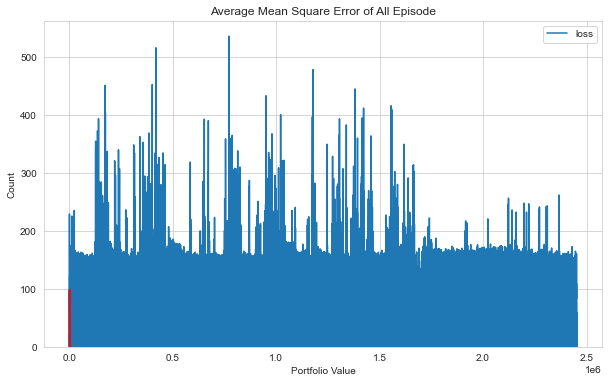

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

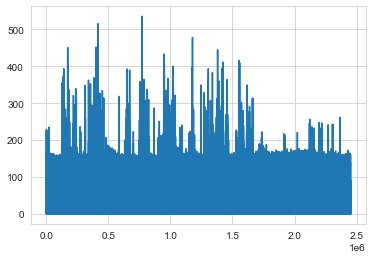

In [5]:
plt.plot(agent.model.losses)

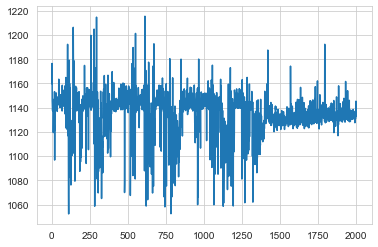

In [6]:
plt.plot(portfolio_value)

episode end value: 856.32, duration: 0:00:00.095021
Sell: 223 times, Buy: 239 times


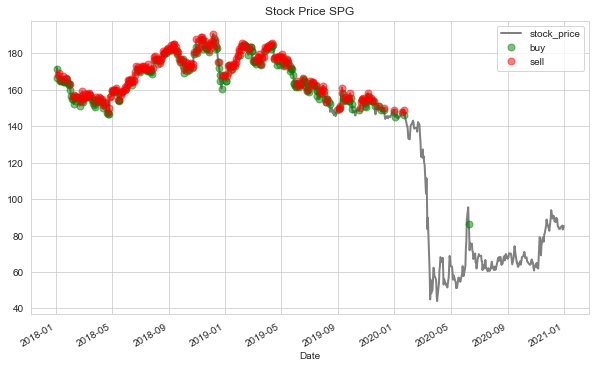

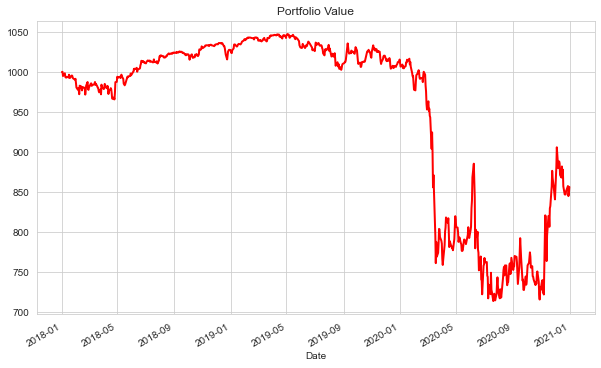

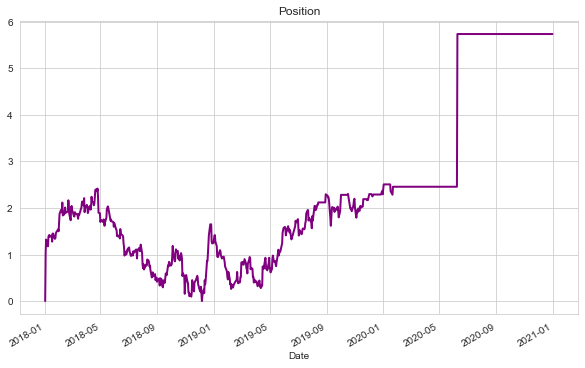

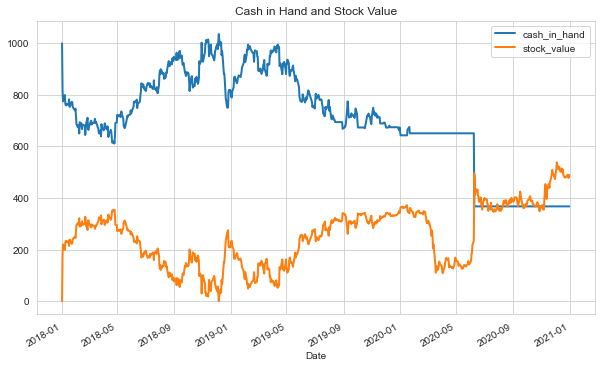

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: SPG
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: -5.04 %
Volatility: 0.1784
shape ratio: -0.3442
Maximun drawdown: -31.84 %
Calmar ratio: -0.1583
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): -20.92 %
Volatility (benchmark): 0.5531
shape ratio: -0.3981
Maximun drawdown: -76.91 %
Calmar ratio (benchmark): -0.2720


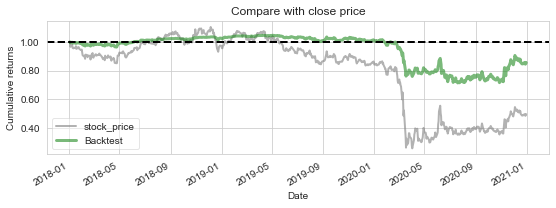

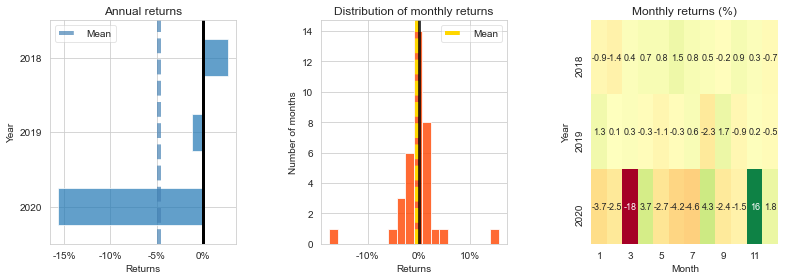

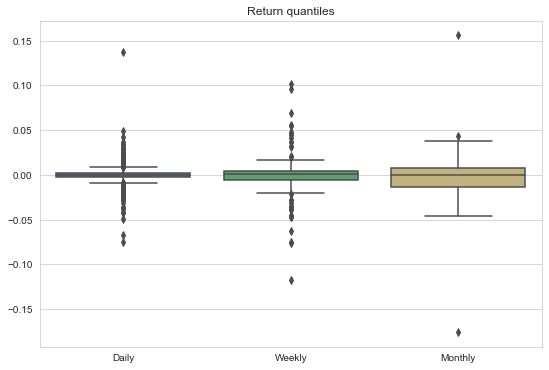

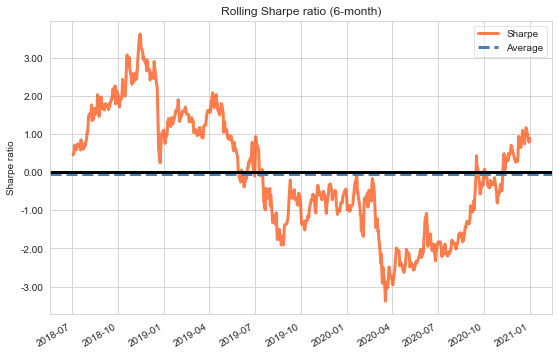

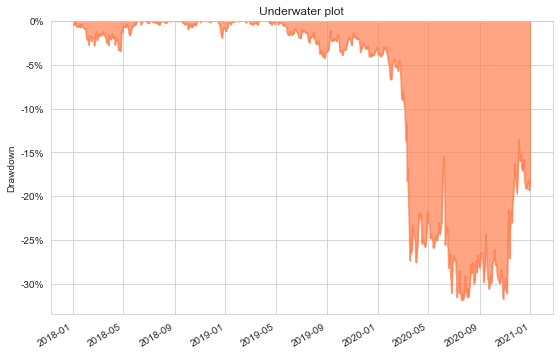

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')